In [408]:
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
import numpy as np
from tqdm.notebook import tqdm as tqdm
import matplotlib.pyplot as plt

In [409]:
import pickle
with open('credit.pkl', 'rb') as f:
    x_credit_train, x_credit_test, y_credit_train, y_credit_test = pickle.load(f)

In [410]:
knn_credit = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_credit.fit(x_credit_train, y_credit_train)

KNeighborsClassifier()

In [411]:
previsoes = knn_credit.predict(x_credit_test)
previsoes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [412]:
accuracy_score(y_credit_test, previsoes)

0.8157377854161552

0.8157377854161552

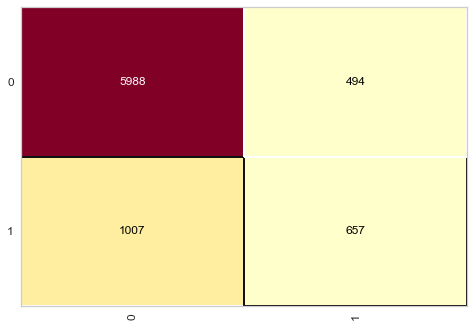

In [413]:
#   _________________________________
#   |True Positive  | False Negative|
#   |---------------|---------------|
#   |False Positive | True Negative |
#   ---------------------------------

cm = ConfusionMatrix(knn_credit)
cm.fit(x_credit_train, y_credit_train)
cm.score(x_credit_test, y_credit_test)

In [414]:
# Classification report:
# Precision:
# TP / (TP + FP)
# Recall:
# TP / (TP + FN)
# F1-Score:
# Harmonic mean of the recall (sensitivity)
# 2TP / (2TP + FP + FN)

print(classification_report(y_credit_test, previsoes))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6482
           1       0.57      0.39      0.47      1664

    accuracy                           0.82      8146
   macro avg       0.71      0.66      0.68      8146
weighted avg       0.80      0.82      0.80      8146



In [415]:
knn_credit = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# n_neighbors --> int --> 0 ... n
#       [1, 60]       

# weights --> ['uniform', 'distance']
#       [0, 1]

# algorithm --> ['auto', 'ball_tree', 'kd_tree', 'brute']
#       [0, 3]

# if algorithm = BallTree or KDTree --> leaf_size --> int
#       [1, 30]

# metric -> ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis']
#       [0, 6]

# metric param 
# p     [2, n?]

In [416]:
def score(argument_list):
    for i in argument_list:
        if i == None:
            return 0
        else: pass

    argument_list = list(argument_list)[:6]
    n_neighbors, weights, algorithm, leaf_size, metric, p = argument_list
    my_knn = KNeighborsClassifier(n_neighbors = n_neighbors, weights = weights, algorithm = algorithm, leaf_size = leaf_size, metric = metric, p = p)
    my_knn.fit(x_credit_train, y_credit_train)

    return float( accuracy_score(y_credit_test, my_knn.predict(x_credit_test)) )

In [417]:
def create_swarm(n):
    best_particle_position = [None, None, None, None, None, None]

    weights = ['uniform', 'distance']
    algorithm = ['auto', 'brute']
    metric = ['minkowski']
    
    swarm = []
    for i in range(n):
            #x, y, v
        particle = {
            'n_neighbors': np.random.randint(1,60),
            'weights': weights[np.random.randint(0,1)],
            'algorithm': algorithm[np.random.randint(0,1)],
            'leaf_size': np.random.randint(1,50),
            'metric': metric[0],
            'p': np.random.randint(2, 10),
            'v': 0,
            'personal_best': [],
            'last_n_neighbors': 0,
            #melhor posição de informates (conjunto de particulas aleatorias selecionadas)
            'informant_best': [None, None, None, None, None, None,]

        }

        particle['v'] = [(particle['n_neighbors'])]
        particle['personal_best'] = [particle['n_neighbors'],
                                    particle['weights'],
                                    particle['algorithm'],
                                    particle['leaf_size'], 
                                    particle['metric'],
                                    particle['p'], 
                                    particle['v'] ]
        
        swarm.append(particle)
    return swarm

In [418]:
swarm = create_swarm(2)

In [419]:
swarm[1]['personal_best']

[39, 'uniform', 'auto', 45, 'minkowski', 5, [39]]

In [420]:
scoreboard = []
for particle in swarm:
    scoreboard.append(score(particle.values()))

scoreboard

[0.8240854407070956, 0.8325558556346673]

In [421]:
scoreboard.sort()
scoreboard[::-1]

[0.8325558556346673, 0.8240854407070956]

In [422]:
def evaluate_best(particle1, particle2):

    if type(particle1) == dict:
        particle1 = particle1.values()

    if type(particle2) == dict:
        particle2 = particle2.values()

    if score(particle1) > score(particle2):
        #print('score1:', score(particle1))
        return list(particle1)
    else:
        #print('score2:', score(particle2)) 
        return list(particle2)

In [423]:
evaluate_best(swarm[0], swarm[1])

[39,
 'uniform',
 'auto',
 45,
 'minkowski',
 5,
 [39],
 [39, 'uniform', 'auto', 45, 'minkowski', 5, [39]],
 0,
 [None, None, None, None, None, None]]

In [490]:
swarm_length = 4
speed_proportion = 0.9
particle_information_num = 3
best_personal_proportion = 0.7
best_information_proportion = 0.8
best_particle_proportion = 0.9
speed_factor = 0.075 * 5
num_iterations = 10

swarm = create_swarm(swarm_length)

best_particle_position = [None, None, None, None, None, None]

iteration_track_best = []

for iteration in tqdm(range(num_iterations),unit="Iteration"):

    for particle in swarm:

        #Evaluate best particle
        best_particle_position = evaluate_best(particle, best_particle_position)
        
    iteration_track_best.append(best_particle_position)
    for particle in swarm:

        #evaluate informant best
        
        if None in particle['informant_best']:
            for inform_part in range(len(particle['informant_best'])):
                particle['informant_best'][inform_part] = particle['personal_best'][inform_part]

        else:
            information_list = []
            
            for j in range(particle_information_num):

                information_list.append(swarm[np.random.randint(0, swarm_length)]['personal_best'])
            
            info_best = information_list[0]
            for k in information_list:
                #print(f'K: {k}')
                #print(f'info best: {info_best}')
                info_best = evaluate_best(k, info_best)

            particle['informant_best'] = info_best
        
        #MOVE THE PARTICLE!!!!
        last_particle = [particle['n_neighbors'],
                        particle['weights'],
                        particle['algorithm'],
                        particle['leaf_size'], 
                        particle['metric'],
                        particle['p'], 
                        particle['v'] ]

        b = np.random.rand() * best_personal_proportion
        c = np.random.rand() * best_information_proportion
        d = np.random.rand() * best_particle_proportion

        inertia = (speed_proportion * particle['v'][0])
        #print(f'Inertia part: {inertia}')
        personal = (b * (particle['personal_best'][0] - particle['n_neighbors']))
        #print(f'personal part: {personal}')
        informant = (c * (particle['informant_best'][0] - particle['n_neighbors']))
        #print(f'informat part: {informant}')
        best = (d * (best_particle_position[0] - particle['n_neighbors']))
        #print(f'best part: {best}')
        v_n_neighbors = inertia + personal + informant + best
       

        particle['v'] = [v_n_neighbors]

        n_calc = abs(int(np.floor(particle['n_neighbors'] + (speed_factor * particle['v'][0]))))
        if n_calc == 0:
            particle['n_neighbors'] = 2
        else:
           particle['n_neighbors'] = n_calc 
        #print(f'Last Particle: {last_particle}')
        #print('-' * 100)
        #print(f'Actual particle: : {particle}')
        #print('-' * 100)
        particle['personal_best'] = evaluate_best(last_particle, particle)
        #x = particle['personal_best']
        #print(f'Personal best: {x}')
        #print('-' * 100)
        best_particle_position = best_particle_position[:7]
    print('-' * 100)
    print(f'Iteration number: {iteration + 1}, particles are moving!')
    print(f'The best Score Is: {score(best_particle_position)}')
    print(f'The parameters are: {best_particle_position[:7]}')
    print('-' * 100)
        


  0%|          | 0/10 [00:00<?, ?Iteration/s]

----------------------------------------------------------------------------------------------------
Iteration number: 1, particles are moving!
The best Score Is: 0.8334151730910877
The parameters are: [35, 'uniform', 'auto', 19, 'minkowski', 7, [35]]
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Iteration number: 2, particles are moving!
The best Score Is: 0.8347655290940339
The parameters are: [18, 'uniform', 'auto', 38, 'minkowski', 3, [18.124785769895624]]
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Iteration number: 3, particles are moving!
The best Score Is: 0.836852442916769
The parameters are: [25, 'uniform', 'auto', 38, 'minkowski', 3, [19.978247427643314]]
-----------

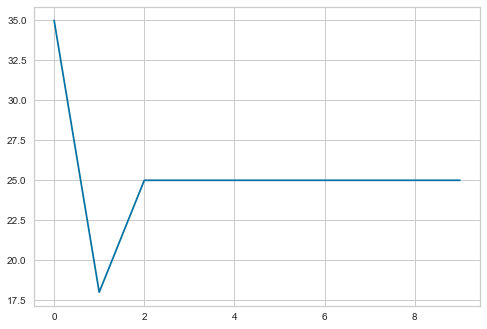

In [491]:
plt.plot([i[0] for i in iteration_track_best]);

In [492]:
print(f'Best position: {best_particle_position}')

Best position: [25, 'uniform', 'auto', 38, 'minkowski', 3, [19.978247427643314]]


In [493]:
best_score = score(best_particle_position)
print(f'Best Score: {best_score}')

Best Score: 0.836852442916769


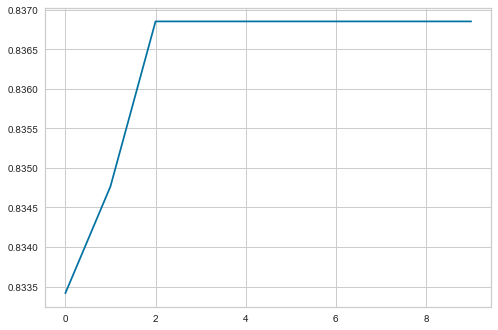

In [494]:
score_tracker = []

for track in iteration_track_best:
    score_tracker.append(score(track))
plt.plot(score_tracker);

In [495]:
print(f'{("{0:.3f}".format(((score_tracker[-1] / score_tracker[0] ) - 1 ) * 100))}% score improve')
print(f'From: {score_tracker[0]}\nTo:   {score_tracker[-1]}')

0.412% score improve
From: 0.8334151730910877
To:   0.836852442916769


In [496]:
#TODO add "P" and optimize with it
#compare with gridsearch (we won it)